In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Install necessary packages**

In [0]:
!sudo apt-get purge --yes openjdk-\* icedtea-\* icedtea6-\*
!sudo apt install --yes openjdk-8-jre-headless
!pip3 install pyspark
!pip3 install findspark
!pip3 install py4j

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'openjdk-9-jre-headless' for glob 'openjdk-*'
Note, selecting 'openjdk-8-jdk' for glob 'openjdk-*'
Note, selecting 'openjdk-8-jre' for glob 'openjdk-*'
Note, selecting 'openjdk-6-jre' for glob 'openjdk-*'
Note, selecting 'openjdk-6-jre-headless' for glob 'openjdk-*'
Note, selecting 'openjdk-11-demo' for glob 'openjdk-*'
Note, selecting 'openjdk-8-demo' for glob 'openjdk-*'
Note, selecting 'openjdk-11-source' for glob 'openjdk-*'
Note, selecting 'openjdk-8-jre-dcevm' for glob 'openjdk-*'
Note, selecting 'openjdk-11-jre-headless' for glob 'openjdk-*'
Note, selecting 'openjdk-11-dbg' for glob 'openjdk-*'
Note, selecting 'openjdk-11-doc' for glob 'openjdk-*'
Note, selecting 'openjdk-8-jdk-headless' for glob 'openjdk-*'
Note, selecting 'openjdk-7-jre-headless' for glob 'openjdk-*'
Note, selecting 'openjdk-8-jre-zero' for glob 'openjdk-*'
Note, selecting 'openjdk-8-source' for glob

# Import statements

Pandas Imports

In [0]:
## standard imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Spark Imports

In [0]:
## spark imports
from pyspark.sql import Row, SparkSession
from pyspark.sql.functions import *

Matplotlib Imports

In [0]:
%matplotlib inline

# **Create Spark session and get context**

In [0]:
# !pip install pyspark

from pyspark.sql import SQLContext
from pyspark.sql import SparkSession

####################################
# Create Spark Session
####################################
spark = SparkSession \
        .builder \
        .appName("Python Spark SQL data source example") \
        .getOrCreate()

# Get spark sql context
sql_context = SQLContext(sparkContext=spark.sparkContext)


# **Read the CSV data file using Spark CSV reader**

Get all data files

In [0]:
file1 = spark.read.csv('DataSet/chicago_crimes_file1.csv', header=True)
file2 = spark.read.csv('DataSet/chicago_crimes_file2.csv', header=True)

In [0]:
file1.count()

66928

In [0]:
file2.count()

34805

Append datafrmes

In [0]:
spark_raw_df = file1.union(file2)
spark_raw_df.count()

101734

In [0]:
spark_raw_df = spark.read.csv('DataSet/Raw_Crimes_-_2001_to_present.csv', header=True, inferSchema=True)
# Cache the dataframe to read it faster
spark_raw_df.cache()

DataFrame[Date: string, ID: int, Case Number: string, Block: string, IUCR: string, Primary Type: string, Description: string, Location Description: string, Arrest: boolean, Domestic: boolean, Beat: int, District: int, Ward: int, Community Area: int, FBI Code: string, X Coordinate: int, Y Coordinate: int, Year: int, Updated On: string, Latitude: double, Longitude: double, Location: string, Historical Wards 2003-2015: int, Zip Codes: string, Community Areas: int, Census Tracts: int, Wards: int, Boundaries - ZIP Codes: int, Police Districts: int, Police Beats: int]

In [0]:
spark_raw_df.show()

+--------------------+--------+-----------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+-----------+------------+--------------------+--------------------------+---------+---------------+-------------+-----+----------------------+----------------+------------+
|                Date|      ID|Case Number|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|   Latitude|   Longitude|            Location|Historical Wards 2003-2015|Zip Codes|Community Areas|Census Tracts|Wards|Boundaries - ZIP Codes|Police Districts|Police Beats|
+--------------------+--------+-----------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+-

In [0]:
# Check the schema of the dataframe
spark_raw_df.printSchema()

root
 |-- Date: string (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: integer (nullable = true)
 |-- Y Coordinate: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Historical Wards 2003-2015: integer (nullable = true)
 |-- Zip Codes: string (nullable = tru

In [0]:
spark_raw_df.show(n=3, truncate=False)

+----------------------+--------+-----------+------------------+----+----------------------+-------------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+-----------+------------+-----------------------------+--------------------------+---------+---------------+-------------+-----+----------------------+----------------+------------+
|Date                  |ID      |Case Number|Block             |IUCR|Primary Type          |Description              |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude   |Longitude   |Location                     |Historical Wards 2003-2015|Zip Codes|Community Areas|Census Tracts|Wards|Boundaries - ZIP Codes|Police Districts|Police Beats|
+----------------------+--------+-----------+------------------+----+----------------------+-------------------------+--------------

# **Plot Data**

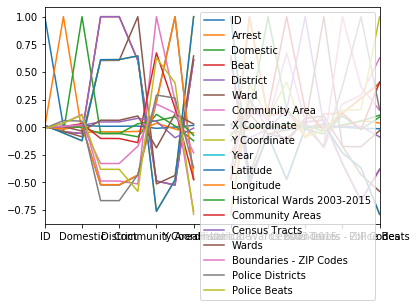

In [0]:
pddf = spark_raw_df.limit(101734)
pddf = pddf.toPandas()

# get pearson corelation
corr = pddf.corr()
# print(corr)

corr.plot()

# **Check the correlation**

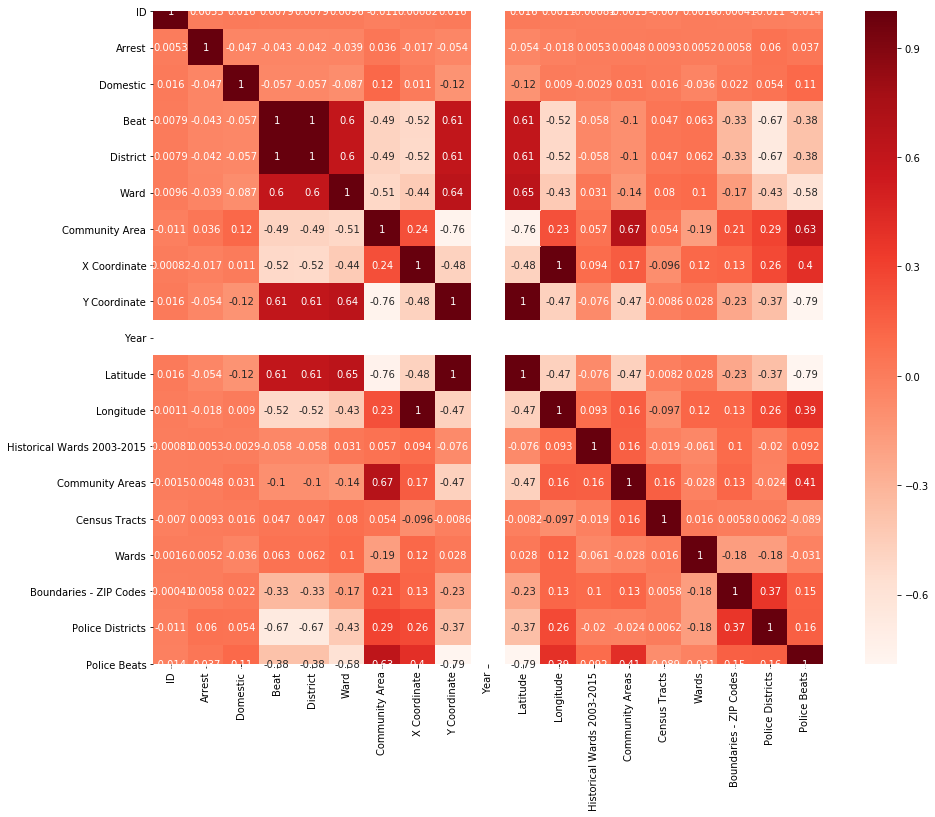

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [0]:
df.printSchema()

root
 |-- Date: string (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: integer (nullable = true)
 |-- Y Coordinate: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Historical Wards 2003-2015: integer (nullable = true)
 |-- Zip Codes: string (nullable = tru

# **Descriptive Analysis**

In [0]:
spark_raw_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Date,101734,None,None,02/28/2019 04:05:00 PM,07/19/2019 12:59:00 PM
ID,101734,1.1663440933552206E7,547328.0535090668,24422,11771317
Case Number,101734,None,None,HR439906,XX333653
Block,101734,None,None,0000X E 100TH PL,137XX S LEYDEN AVE
IUCR,101734,1092.509080086467,861.2591268291974,031A,935
Primary Type,101734,None,None,ARSON,WEAPONS VIOLATION
Description,101734,None,None,$500 AND UNDER,VIOLENT OFFENDER: FAIL TO REGISTER NEW ADDRESS
Location Description,101400,None,None,"""CTA """"L"""" PLATFORM""",YARD
Beat,101734,1132.3167967444513,694.3976238649383,111,2535


# **Check dataframe size**

In [0]:
print(spark_raw_df.count())

# **Check rows with null values**

In [0]:
import pyspark.sql.functions as f
from functools import reduce

spark_raw_df.where(reduce(lambda x, y: x | y, (f.col(x).isNull() for x in spark_raw_df.columns))).count()

16046

As we can see above, the number of rows with null values is only 16046, which is very low compared to the size of our data-set, hence it will be feasible to remove them.
But since we are going to focus on just the record count of Primary Type for each logged date, we only need to check null values in Primary Type and Date column

In [0]:
spark_raw_df.where(f.col('Date').isNull() | f.col('Primary Type').isNull()).count()

0

# **Check for duplicates**

In [0]:
df = spark_raw_df

if df.count() > df.dropDuplicates(df.columns).count():
  raise ValueError('Data has duplicates')
else:
  print("No duplicates")

No duplicates


# **Drop rows with null values**

In [0]:
spark_not_null_df = spark_raw_df.dropna()
print(spark_not_null_df.count())
spark_not_null_df.show()

885409
+--------------------+--------+-----------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+-----------+------------+--------------------+--------------------------+---------+---------------+-------------+-----+----------------------+----------------+------------+
|                Date|      ID|Case Number|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|   Latitude|   Longitude|            Location|Historical Wards 2003-2015|Zip Codes|Community Areas|Census Tracts|Wards|Boundaries - ZIP Codes|Police Districts|Police Beats|
+--------------------+--------+-----------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------

# **Crosstab**
provided by Spark
Here the limitation is that the number of classes to be crosstabed should be low

In [0]:
spark_raw_df.limit(5000).stat.crosstab("Date", "Primary Type").show()

+--------------------+-----+-------+-------+--------+---------------------------------+-------------------+---------------+-----------------+------------------+--------+--------+--------------------------------+----------+--------------------+-------------------+---------+------------+---------+--------------------------+-------------+------------+----------------------+-------+-----------+--------+-----+-----------------+
|   Date_Primary Type|ARSON|ASSAULT|BATTERY|BURGLARY|CONCEALED CARRY LICENSE VIOLATION|CRIM SEXUAL ASSAULT|CRIMINAL DAMAGE|CRIMINAL TRESPASS|DECEPTIVE PRACTICE|GAMBLING|HOMICIDE|INTERFERENCE WITH PUBLIC OFFICER|KIDNAPPING|LIQUOR LAW VIOLATION|MOTOR VEHICLE THEFT|NARCOTICS|NON-CRIMINAL|OBSCENITY|OFFENSE INVOLVING CHILDREN|OTHER OFFENSE|PROSTITUTION|PUBLIC PEACE VIOLATION|ROBBERY|SEX OFFENSE|STALKING|THEFT|WEAPONS VIOLATION|
+--------------------+-----+-------+-------+--------+---------------------------------+-------------------+---------------+-----------------+-----

# **Construct Data**

Convert date column data to DateTime object

In [0]:
transformed_df = spark_raw_df.withColumn('DateTime', to_timestamp('date', 'MM/dd/yyyy hh:mm:ss a'))

# **Reduce unwanted columns**

In [0]:
transformed_df = transformed_df.select(['DateTime', 'Primary Type'])
transformed_df.show()

+-------------------+--------------------+
|           DateTime|        Primary Type|
+-------------------+--------------------+
|2019-07-19 23:55:00|             ASSAULT|
|2019-07-19 23:52:00|               THEFT|
|2019-07-19 23:50:00|PUBLIC PEACE VIOL...|
|2019-07-19 23:45:00|             BATTERY|
|2019-07-19 23:45:00|   WEAPONS VIOLATION|
|2019-07-19 23:45:00|               THEFT|
|2019-07-19 23:44:00|     CRIMINAL DAMAGE|
|2019-07-19 23:42:00|             BATTERY|
|2019-07-19 23:42:00|       OTHER OFFENSE|
|2019-07-19 23:40:00|     CRIMINAL DAMAGE|
|2019-07-19 23:40:00|             ASSAULT|
|2019-07-19 23:40:00|             BATTERY|
|2019-07-19 23:38:00|   CRIMINAL TRESPASS|
|2019-07-19 23:38:00|           NARCOTICS|
|2019-07-19 23:37:00|   WEAPONS VIOLATION|
|2019-07-19 23:35:00|               THEFT|
|2019-07-19 23:33:00|           NARCOTICS|
|2019-07-19 23:30:00|             BATTERY|
|2019-07-19 23:30:00|     CRIMINAL DAMAGE|
|2019-07-19 23:30:00|             ROBBERY|
+----------

Sort data

In [0]:
transformed_df.sort(desc("DateTime"))

transformed_df.show()

+-------------------+--------------------+
|           DateTime|        Primary Type|
+-------------------+--------------------+
|2019-07-19 23:55:00|             ASSAULT|
|2019-07-19 23:52:00|               THEFT|
|2019-07-19 23:50:00|PUBLIC PEACE VIOL...|
|2019-07-19 23:45:00|             BATTERY|
|2019-07-19 23:45:00|   WEAPONS VIOLATION|
|2019-07-19 23:45:00|               THEFT|
|2019-07-19 23:44:00|     CRIMINAL DAMAGE|
|2019-07-19 23:42:00|             BATTERY|
|2019-07-19 23:42:00|       OTHER OFFENSE|
|2019-07-19 23:40:00|     CRIMINAL DAMAGE|
|2019-07-19 23:40:00|             ASSAULT|
|2019-07-19 23:40:00|             BATTERY|
|2019-07-19 23:38:00|   CRIMINAL TRESPASS|
|2019-07-19 23:38:00|           NARCOTICS|
|2019-07-19 23:37:00|   WEAPONS VIOLATION|
|2019-07-19 23:35:00|               THEFT|
|2019-07-19 23:33:00|           NARCOTICS|
|2019-07-19 23:30:00|             BATTERY|
|2019-07-19 23:30:00|     CRIMINAL DAMAGE|
|2019-07-19 23:30:00|             ROBBERY|
+----------

Get only battery crime records

In [0]:
battery_crimes = transformed_df.filter(spark_raw_df['Primary Type'] == 'BATTERY')
print(battery_crimes.count())

battery_crimes.show()

169090
+-------------------+------------+
|           DateTime|Primary Type|
+-------------------+------------+
|2019-07-19 23:45:00|     BATTERY|
|2019-07-19 23:42:00|     BATTERY|
|2019-07-19 23:40:00|     BATTERY|
|2019-07-19 23:30:00|     BATTERY|
|2019-07-19 23:27:00|     BATTERY|
|2019-07-19 23:25:00|     BATTERY|
|2019-07-19 23:22:00|     BATTERY|
|2019-07-19 23:10:00|     BATTERY|
|2019-07-19 23:06:00|     BATTERY|
|2019-07-19 23:04:00|     BATTERY|
|2019-07-19 22:59:00|     BATTERY|
|2019-07-19 22:54:00|     BATTERY|
|2019-07-19 22:50:00|     BATTERY|
|2019-07-19 22:50:00|     BATTERY|
|2019-07-19 22:45:00|     BATTERY|
|2019-07-19 22:43:00|     BATTERY|
|2019-07-19 22:30:00|     BATTERY|
|2019-07-19 22:24:00|     BATTERY|
|2019-07-19 22:20:00|     BATTERY|
|2019-07-19 22:00:00|     BATTERY|
+-------------------+------------+
only showing top 20 rows



Group data for weekly frequency

In [0]:
crime_type_group = spark_raw_df.groupBy('Primary Type').count()

crime_type_count = crime_type_group.orderBy('count', ascending=False)

In [0]:
crime_type_count.show()

+--------------------+------+
|        Primary Type| count|
+--------------------+------+
|               THEFT|214317|
|             BATTERY|169090|
|     CRIMINAL DAMAGE| 97547|
|             ASSAULT| 67260|
|  DECEPTIVE PRACTICE| 62931|
|       OTHER OFFENSE| 58336|
|           NARCOTICS| 43221|
|            BURGLARY| 41839|
|             ROBBERY| 35806|
| MOTOR VEHICLE THEFT| 35630|
|   CRIMINAL TRESPASS| 22798|
|   WEAPONS VIOLATION| 16585|
|OFFENSE INVOLVING...|  7700|
| CRIM SEXUAL ASSAULT|  5432|
|PUBLIC PEACE VIOL...|  5111|
|INTERFERENCE WITH...|  4077|
|         SEX OFFENSE|  3614|
|        PROSTITUTION|  2469|
|            HOMICIDE|  2218|
|               ARSON|  1443|
+--------------------+------+
only showing top 20 rows



Get weekly frequency of Battery Crime

In [0]:
battery_weekly_count = battery_crimes.groupby(window(col('DateTime'), '1 week')).count()

battery_weekly_count.show()

+--------------------+-----+
|              window|count|
+--------------------+-----+
|[2019-03-28 00:00...|  587|
|[2017-10-19 00:00...|  960|
|[2017-03-16 00:00...|  890|
|[2016-12-15 00:00...|  752|
|[2017-09-07 00:00...|  114|
|[2019-04-18 00:00...|  958|
|[2017-12-21 00:00...|  755|
|[2017-01-12 00:00...|  666|
|[2018-02-22 00:00...|  868|
|[2016-07-28 00:00...|  609|
|[2017-04-20 00:00...|  982|
|[2018-06-14 00:00...| 1175|
|[2017-08-17 00:00...| 1064|
|[2017-07-27 00:00...|  799|
|[2018-03-29 00:00...|  328|
|[2016-12-29 00:00...|  369|
|[2016-06-23 00:00...| 1085|
|[2019-02-14 00:00...|  888|
|[2018-11-08 00:00...|  188|
|[2018-01-25 00:00...|  905|
+--------------------+-----+
only showing top 20 rows



# **Explore Data**

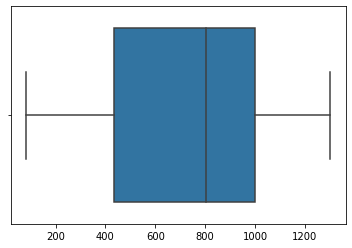

In [0]:
import seaborn as sns

mvv = battery_weekly_count.select("count").rdd.flatMap(lambda x: x).collect()

sns.boxplot(x=mvv)

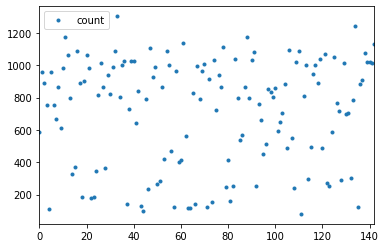

In [0]:
battery_weekly_count.toPandas().plot(style=".")

# **Check most frequent crimes**

[Text(0, 0.5, 'Primary Type'), Text(0.5, 0, 'Crimes Record Count')]

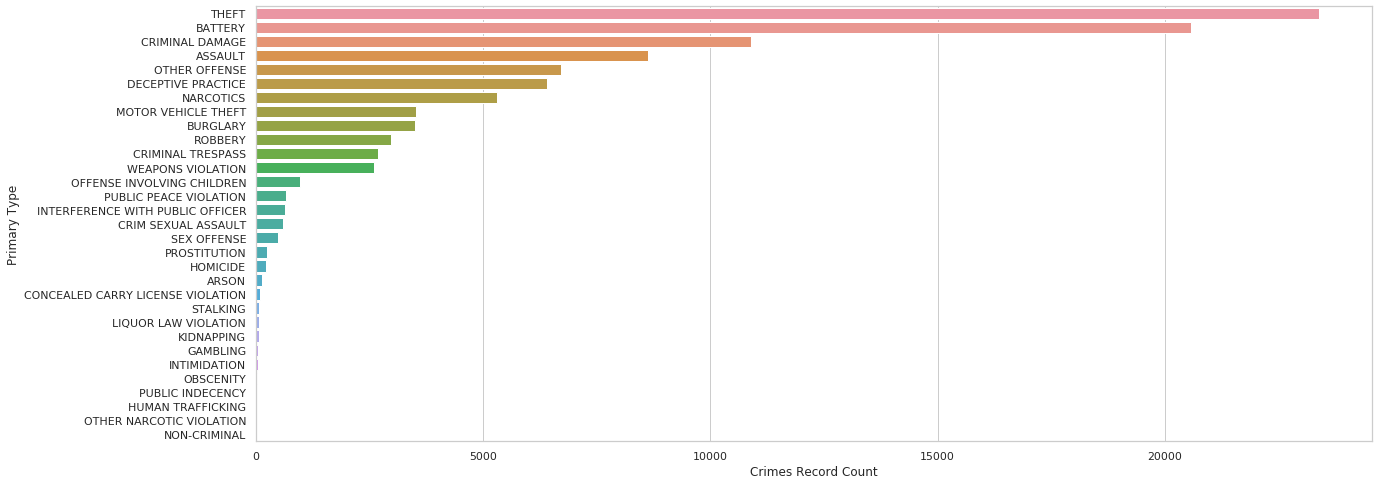

In [0]:
# convert the the Spark Dataframe to Pandas Dataframe
counts_pddf = pd.DataFrame(crime_type_count.rdd.map(lambda l: l.asDict()).collect())

# plot the date
plt.rcParams["figure.figsize"] = [20, 8]

sns.set(style="whitegrid")
sns.set_color_codes("pastel")

#sns.despine(left=True, bottom=True)
type_graph = sns.barplot(x='count', y='Primary Type', data=counts_pddf)
type_graph.set(ylabel="Primary Type", xlabel="Crimes Record Count")

# **Check each feature detail**

In [0]:
spark_raw_df.describe().show()

Check the crime trend

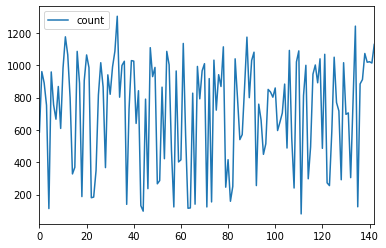

In [0]:
# convert the the Spark Dataframe to Pandas Dataframe
counts_pddf = pd.DataFrame(battery_weekly_count.rdd.map(lambda l: l.asDict()).collect())

# plot data
counts_pddf.plot()

# **Prepare data for Regression**

In [0]:
# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=['count'],
    outputCol="features")

output = assembler.transform(battery_weekly_count)

In [0]:
final_data = output.select("features","count")
final_data.show()

+--------+-----+
|features|count|
+--------+-----+
| [587.0]|  587|
| [960.0]|  960|
| [890.0]|  890|
| [752.0]|  752|
| [114.0]|  114|
| [958.0]|  958|
| [755.0]|  755|
| [666.0]|  666|
| [868.0]|  868|
| [609.0]|  609|
| [982.0]|  982|
|[1175.0]| 1175|
|[1064.0]| 1064|
| [799.0]|  799|
| [328.0]|  328|
| [369.0]|  369|
|[1085.0]| 1085|
| [888.0]|  888|
| [188.0]|  188|
| [905.0]|  905|
+--------+-----+
only showing top 20 rows



# **Split data into Training and Test set**

In [0]:
splits = final_data.randomSplit([0.8, 0.2])
train_df = splits[0]
test_df = splits[1]

train_df.show()

+--------+-----+
|features|count|
+--------+-----+
| [890.0]|  890|
| [960.0]|  960|
| [114.0]|  114|
| [666.0]|  666|
| [609.0]|  609|
| [982.0]|  982|
|[1175.0]| 1175|
| [799.0]|  799|
|[1064.0]| 1064|
| [328.0]|  328|
| [369.0]|  369|
|[1085.0]| 1085|
| [888.0]|  888|
| [188.0]|  188|
| [905.0]|  905|
|[1063.0]| 1063|
| [181.0]|  181|
| [185.0]|  185|
| [815.0]|  815|
|[1015.0]| 1015|
+--------+-----+
only showing top 20 rows



# **Create Linear regression model**

In [0]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol = 'features', labelCol="count", maxIter=20, regParam=0.1, elasticNetParam=0.9)

lr_model = lr.fit(train_df)

print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [0.9997050304368991]
Intercept: 0.20604053549937773


# **Evaluate Model**

In [0]:
test_results = lr_model.evaluate(test_df)

# Interesting results! This shows the difference between the predicted value and the test data.
test_results.residuals.show()

# Let's get some evaluation metrics (as discussed in the previous linear regression notebook).
print("RSME: {}".format(test_results.rootMeanSquaredError))

+--------------------+
|           residuals|
+--------------------+
|-0.03289340195908608|
|0.015776575952486382|
|  0.0765403059513119|
|0.016661484641872448|
| 0.04999304527223103|
| 0.08450448415510436|
|-0.10339112754024882|
|-0.09778670584131532|
| 0.03583450624341822|
| 0.09600829711598635|
| -0.1361327490444353|
| 0.04881316701982996|
| 0.08951896672772364|
| 0.07831012332997034|
| 0.09158375366951077|
|  0.0980730840576598|
|0.006927489059535219|
| 0.04999304527223103|
|-0.13200317516103155|
| 0.10043284056246193|
+--------------------+
only showing top 20 rows

RSME: 0.087621038380473


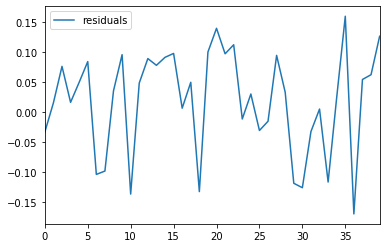

In [0]:
test_results.residuals.toPandas().plot()

In [0]:
battery_weekly_count.describe().show()

+-------+------------------+
|summary|             count|
+-------+------------------+
|  count|               143|
|   mean| 716.6013986013986|
| stddev|328.46439856518805|
|    min|                81|
|    max|              1302|
+-------+------------------+



In [0]:
prediction = lr_model.transform(final_data)

prediction.show()

+--------+-----+------------------+
|features|count|        prediction|
+--------+-----+------------------+
| [587.0]|  587| 587.0986656541947|
| [960.0]|  960| 959.7686433863469|
| [890.0]|  890| 889.8305778602057|
| [752.0]|  752| 751.9526772515275|
| [114.0]|  114|114.51716574184098|
| [958.0]|  958| 957.7704129427428|
| [755.0]|  755| 754.9500229169336|
| [666.0]|  666| 666.0287681765541|
| [868.0]|  868| 867.8500429805614|
| [609.0]|  609| 609.0792005338391|
| [982.0]|  982| 981.7491782659912|
|[1175.0]| 1175|1174.5784160737803|
|[1064.0]| 1064|1063.6766264537566|
| [799.0]|  799| 798.9110926762222|
| [328.0]|  328|328.32782320747253|
| [369.0]|  369| 369.2915473013552|
|[1085.0]| 1085|1084.6580461115989|
| [888.0]|  888| 887.8323474166017|
| [188.0]|  188|188.45169215519022|
| [905.0]|  905|  904.817306187236|
+--------+-----+------------------+
only showing top 20 rows



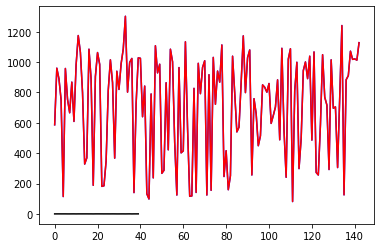

In [0]:
import matplotlib.pyplot as plt

pandasPredictionDf = prediction.toPandas()

plt.plot(pandasPredictionDf['count'], color='blue', label='Count')
plt.plot(pandasPredictionDf['prediction'], color='red', label='Prediction')
plt.plot(test_results.residuals.toPandas()['residuals'], color='black', label='Residual')
plt.show()

# **Implement ARIMA from pandas**

ARIMA is a model specially designed for Timeseries data hence we need to test the outputs for ARIMA model as well.

In [0]:
# First thing is to convert the spark dataframe to pandas dataframe

battery_crimes_pandas = battery_crimes.toPandas()
battery_crimes_pandas.head()

,DateTime,Primary Type
0,2019-07-19 23:45:00,BATTERY
1,2019-07-19 23:42:00,BATTERY
2,2019-07-19 23:40:00,BATTERY
3,2019-07-19 23:30:00,BATTERY
4,2019-07-19 23:27:00,BATTERY


In [0]:
import pandas as pd

battery_crimes_pandas.index = pd.to_datetime(battery_crimes_pandas.DateTime)
battery_crimes_pandas.head()

,DateTime,Primary Type
DateTime,,
2019-07-19 23:45:00,2019-07-19 23:45:00,BATTERY
2019-07-19 23:42:00,2019-07-19 23:42:00,BATTERY
2019-07-19 23:40:00,2019-07-19 23:40:00,BATTERY
2019-07-19 23:30:00,2019-07-19 23:30:00,BATTERY
2019-07-19 23:27:00,2019-07-19 23:27:00,BATTERY


In [0]:
battery_crimes_pandas_reduced = battery_crimes_pandas.iloc[:,1:]
battery_crimes_pandas_reduced.head()

,Primary Type
DateTime,
2019-07-19 23:45:00,BATTERY
2019-07-19 23:42:00,BATTERY
2019-07-19 23:40:00,BATTERY
2019-07-19 23:30:00,BATTERY
2019-07-19 23:27:00,BATTERY


Filter data for Theft crimes

In [0]:
# battery_crimes_pd = pd.DataFrame(theft_crimes_pandas_reduced[theft_crimes_pandas_reduced['Primary Type'].isin(['THEFT'])]['Primary Type'])
# battery_crimes_pd.head()

# now that we have extracted the records for THEFT crime, we need to find frequency for each week
# pandas groupby acceps a list of paramerters by which it groups data
# here we are using the TimrGrouper feature provided by pandas that groups the data based on the time interval provided which in our case is weekly
# the grouper can then be used to count the frequency in each interval
# Note: to use the TimeGrouper function of pandas, the dataframe index should be timestamp

grouper = battery_crimes_pandas_reduced.groupby([pd.Grouper(freq='1W'), 'Primary Type'])
battery_freq = grouper['Primary Type'].count().rename("Count").unstack()
battery_freq.head()

Primary Type,BATTERY
DateTime,
2016-03-13,146
2016-03-20,991
2016-03-27,994
2016-04-03,616
2016-04-17,738


In [0]:
import requests, pandas as pd, numpy as np
from pandas import DataFrame
from io import StringIO
import time, json
from datetime import date
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [0]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    plt.figure(figsize=(20,15))
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    # std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['BATTERY'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

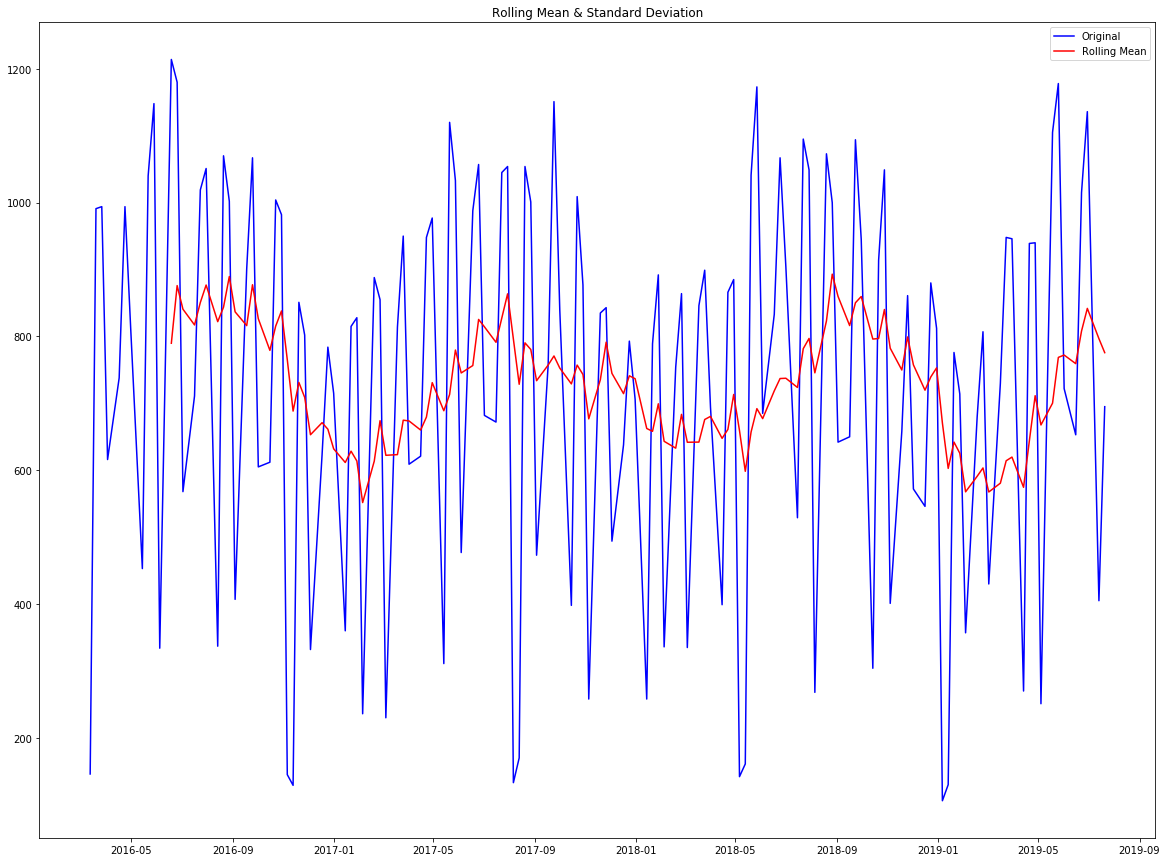

ADF Statistic: -3.4391483727021868
p-value: 0.009694537265934099
Critical Values:
	1%: -3.4808880719210005
	5%: -2.8836966192225284
	10%: -2.5785857598714417


In [0]:
get_stationarity(battery_freq)

Since the p-value is low, we can say that the data is stable and hence we don't have to stabalize it.

# **Check autocorrelation**

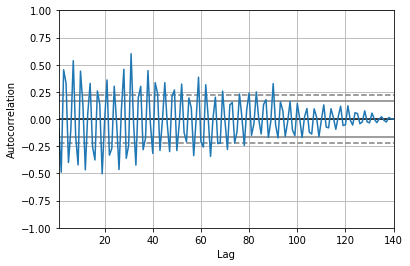

In [0]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(battery_freq)

# **Try to redict moving average**

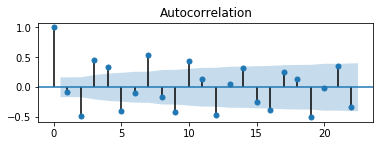

In [0]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot as plt

plt.figure()
plt.subplot(211)
plot_acf(battery_freq, ax=plt.gca())
plt.show()

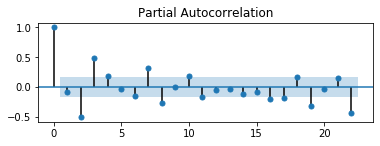

In [0]:
plt.subplot(212)
plot_pacf(battery_freq, ax=plt.gca())
plt.show()

# **Create base ARIMA model**

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.BATTERY   No. Observations:                  139
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1035.435
Method:                       css-mle   S.D. of innovations            415.666
Date:                Sun, 27 Oct 2019   AIC                           2076.870
Time:                        22:40:14   BIC                           2085.674
Sample:                             1   HQIC                          2080.448
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.0466     27.036      0.076      0.940     -50.943      55.036
ar.L1.D.BATTERY    -0.3064      0.082     -3.751      0.000      -0.466      -0.146
                                

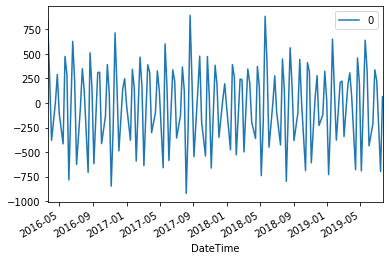

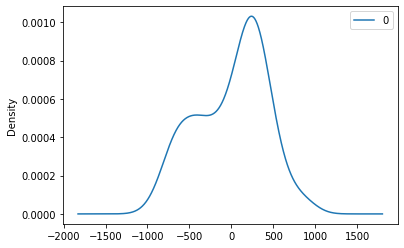

In [0]:
# For modelling, followig article was reffered
# Time Series Forecast Case Study with Python: Monthly Armed Robberies in Boston
# by Jason Brownlee
# https://machinelearningmastery.com/time-series-forecast-case-study-python-monthly-armed-robberies-boston/

# since our problem is a time series problem, we are selecting algorithms that handle time series problems
# one such algorith is ARIMA
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters


# create a base model
model = ARIMA(battery_freq, order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())


# plot residual errors
residual = pd.DataFrame(model_fit.resid)
residual.plot()
residual.plot(kind='kde')

print(residual.describe())

forecast = model_fit.forecast()
print(forecast[0])

# **Predict Data**

predicted=769.224210, expected=1095.000000
predicted=649.212704, expected=1049.000000
predicted=640.460932, expected=268.000000
predicted=835.068765, expected=1073.000000
predicted=672.030610, expected=1000.000000
predicted=651.176095, expected=642.000000
predicted=742.828073, expected=650.000000
predicted=765.182717, expected=1094.000000
predicted=650.868767, expected=945.000000
predicted=666.334689, expected=304.000000
predicted=842.258095, expected=914.000000
predicted=721.834077, expected=1049.000000
predicted=651.135786, expected=401.000000
predicted=815.122779, expected=658.000000
predicted=787.159435, expected=861.000000
predicted=720.635130, expected=572.000000
predicted=784.620180, expected=546.000000
predicted=808.402270, expected=880.000000
predicted=719.493196, expected=812.000000
predicted=713.778221, expected=106.000000
predicted=916.863607, expected=130.000000
predicted=917.094443, expected=776.000000
predicted=760.036184, expected=714.000000
predicted=740.872347, expect

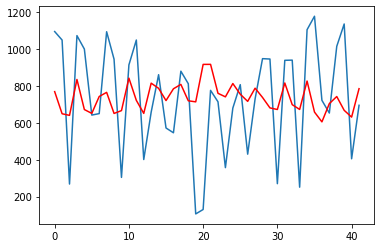

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
from sklearn.metrics import mean_squared_error
from math import sqrt

battery_values = battery_freq.values
battery_values = battery_values.astype('float32')
size = int(len(battery_values) * 0.70)
train, test = battery_values[0:size], battery_values[size:len(battery_values)]
history = [x for x in train]

predictions = list()

model = ARIMA(history, order=(2,0,2))
model_fit = model.fit(disp=0)

for t in range(len(test)):
	model = ARIMA(history, order=(2,0,2))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
rmse = sqrt(error)
print('Test MSE: %.3f' % rmse)
print(model_fit.summary())

residual = pd.DataFrame(model_fit.resid)
print(residual.describe())
# print('Model score is', model.score())
# plot
plt.plot(test)
plt.plot(predictions, color='red')
# plt.legend(loc = 'best')
plt.show()

# **Get the best ARIMA configuration**

In [0]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
 
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.70)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	mse = mean_squared_error(test, predictions)
	rmse = sqrt(mse)
	return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
 
# load dataset
series = battery_freq
# evaluate parameters
p_values = range(0,10)
d_values = range(0, 4)
q_values = range(0, 10)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

NameError: ignored